In [52]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [53]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ortho_knnnb.csv")

In [54]:
dataset.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [55]:
print("Dimension of dataset:", dataset.shape)
print("Number of rows in the dataset:", dataset.shape[0])
print("Number of columns in the dataset:", dataset.shape[1])

Dimension of dataset: (310, 7)
Number of rows in the dataset: 310
Number of columns in the dataset: 7


In [56]:
print("Column Names:",dataset.columns.values)

Column Names: ['pelvic_incidence' 'pelvic_tilt numeric' 'lumbar_lordosis_angle'
 'sacral_slope' 'pelvic_radius' 'degree_spondylolisthesis' 'class']


We are trying to predict weather the classification is normal or abnormal.

In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [58]:
dataset.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


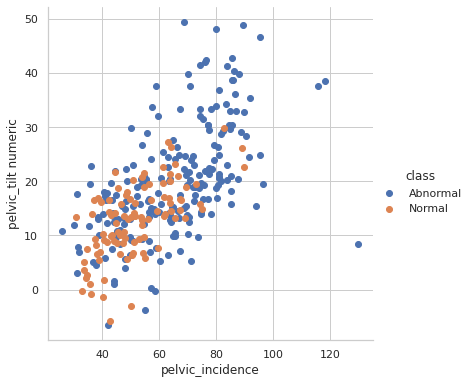

In [59]:
import seaborn as sns

sns.set_style("whitegrid");
sns.FacetGrid(dataset, hue="class", size=5.5) \
   .map(plt.scatter, "pelvic_incidence", "pelvic_tilt numeric") \
   .add_legend();
plt.show();

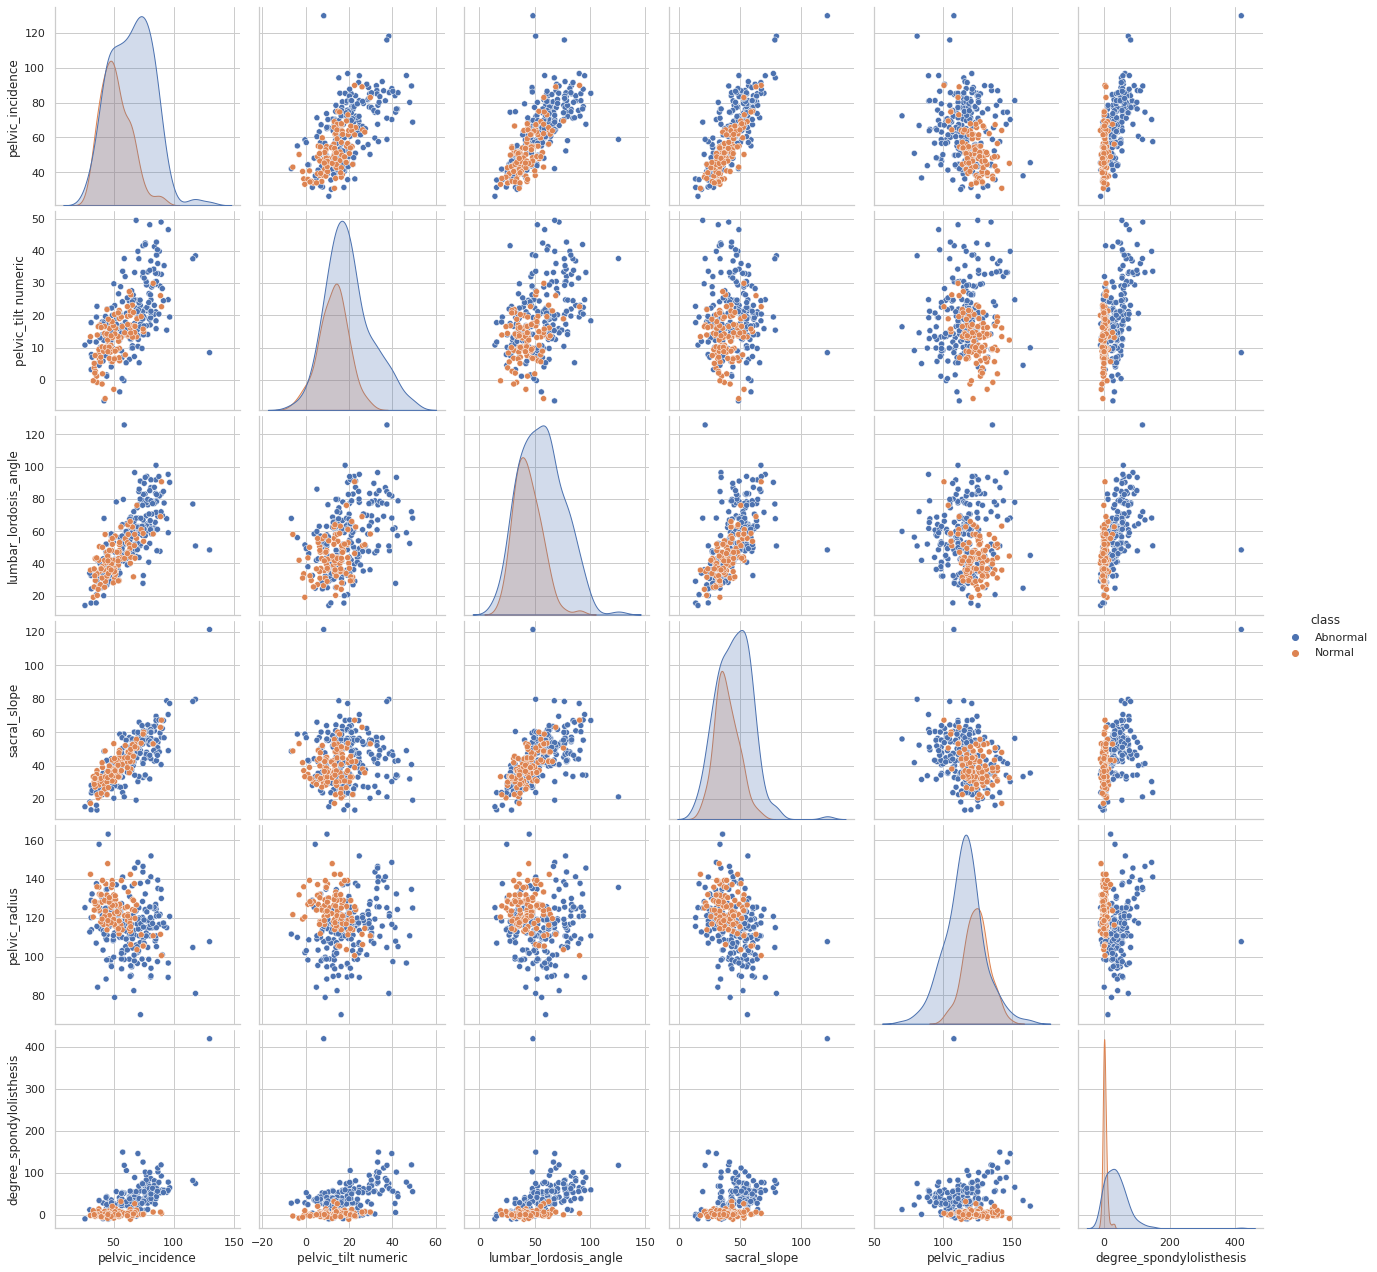

In [60]:
sns.set_style("whitegrid");
sns.pairplot(dataset, hue="class", size=3);
plt.show()

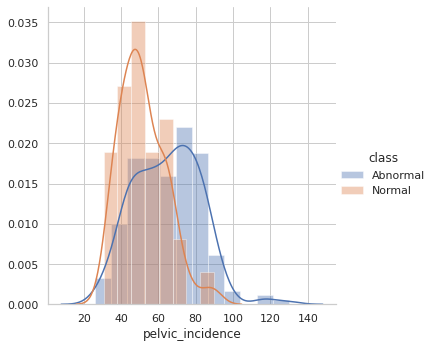

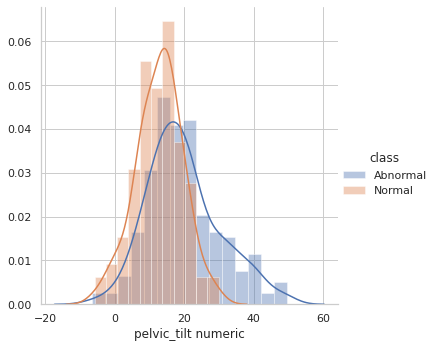

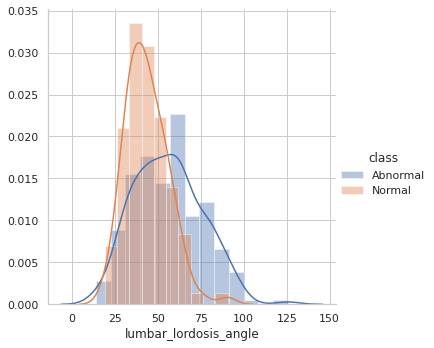

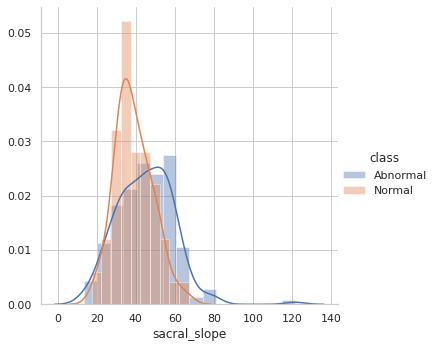

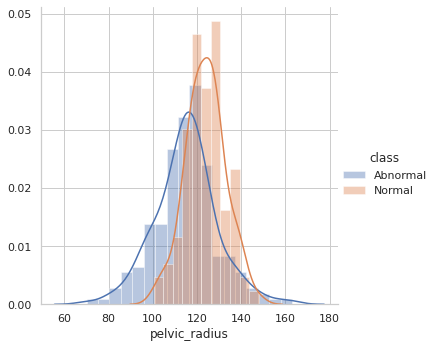

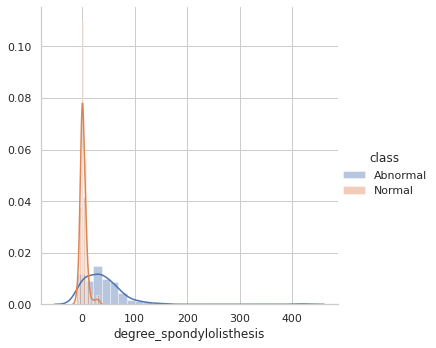

In [61]:
for name in dataset.columns.values[:-1]:
    sns.FacetGrid(dataset, hue="class", size=5).map(sns.distplot, name).add_legend()
plt.show()

In [62]:
X = dataset.iloc[:, :-1]
display(X)

Y = dataset.iloc[:, -1]
display(Y)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


0      Abnormal
1      Abnormal
2      Abnormal
3      Abnormal
4      Abnormal
         ...   
305      Normal
306      Normal
307      Normal
308      Normal
309      Normal
Name: class, Length: 310, dtype: object

In [67]:
symptom_class = ['Abnormal:1', 'Normal:0']

In [70]:
dataset['symptom_class'] 
dataset.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [63]:
from sklearn import preprocessing

In [64]:
label_encoder=preprocessing.LabelEncoder()
dataset['symptom_class']=label_encoder.fit_transform(dataset['class'])

In [65]:
dataset.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,symptom_class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal,0


In [66]:
dataset= dataset.drop('class', axis=1)
dataset.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [72]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.20,random_state = 1)

In [73]:
train_x = train.drop(['symptom_class'], axis = 1)
train_y = train['symptom_class']             

test_x = test.drop(['symptom_class'],axis = 1)
test_y = test['symptom_class']

In [74]:
print('Dimension of train_x :',train_x.shape)
print('Dimension of train_y :',train_y.shape)
print('Dimension of test_x :',test_x.shape)
print('Dimension of test_y :',test_y.shape)

Dimension of train_x : (248, 6)
Dimension of train_y : (248,)
Dimension of test_x : (62, 6)
Dimension of test_y : (62,)


In [77]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [78]:
pred = KNN.predict(test_x)
pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [79]:
from sklearn.metrics import accuracy_score

print('The accuracy of the KNN with K=3 is {}%'.format(round(accuracy_score(pred,test_y)*100,2)))

The accuracy of the KNN with K=3 is 83.87%


In [80]:
from sklearn.metrics import accuracy_score

print('The accuracy of the KNN with K=5 is {}%'.format(round(accuracy_score(pred,test_y)*100,2)))

The accuracy of the KNN with K=5 is 83.87%


In [82]:
train_accuracy =[]
test_accuracy = []
for k in range(1,15):
  
  KNN = KNeighborsClassifier(n_neighbors=k)
 
  KNN.fit(train_x, train_y)
 
  train_pred = KNN.predict(train_x)
  train_score = accuracy_score(train_pred, train_y)
  train_accuracy.append(train_score)
  
  test_pred = KNN.predict(test_x)
  test_score = accuracy_score(test_pred, test_y)
  test_accuracy.append(test_score)

print("Best accuracy is {} with K = {}".format(max(test_accuracy),1+test_accuracy.index(max(test_accuracy))))

Best accuracy is 0.8548387096774194 with K = 1


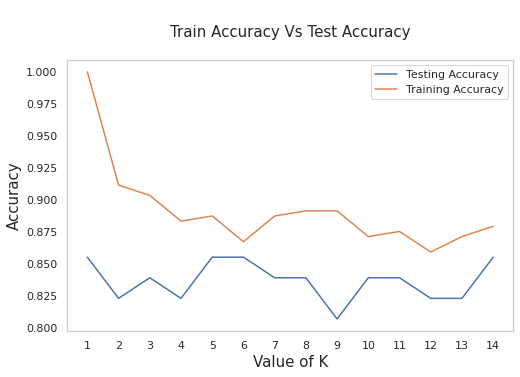

In [102]:
plt.figure(figsize=[8,5]) #Accuracy Plot
plt.plot(range(1,15), test_accuracy, label = 'Testing Accuracy')
plt.plot(range(1,15), train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('\nTrain Accuracy Vs Test Accuracy\n',fontsize=15)
plt.xlabel('Value of K',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.xticks(range(1,15))
plt.grid()
plt.show()

In [87]:
from sklearn.model_selection import GridSearchCV

knn_params = {"n_neighbors": list(range(1,15,1)), 'metric': ['euclidean','manhattan']}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
grid_knn.fit(train_x, train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [88]:
knn_besthypr = grid_knn.best_estimator_ #KNN best estimator
knn_besthypr

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [89]:
print("Tuned hyperparameter: {}".format(grid_knn.best_params_)) 
print("Best score: {}".format(grid_knn.best_score_))

Tuned hyperparameter: {'metric': 'manhattan', 'n_neighbors': 10}
Best score: 0.8546122448979592


In [95]:
knn = knn_besthypr.fit(train_x,train_y) #Using best hyperparameter
y_pred = knn.predict(test_x)
acc = accuracy_score(y_pred,test_y)
print('The accuracy of the KNN with K = {} is {}%'.format(knn_besthypr.n_neighbors,round(acc*100,2)))

The accuracy of the KNN with K = 10 is 80.65%


In [96]:
test = test.reset_index(drop = True) #actual value and predicted value
test["pred_value"] = y_pred
test

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class,pred_species,pred_value
0,67.412538,17.442797,60.144640,49.969741,111.123970,33.157646,0,0,0
1,63.026300,27.336240,51.605017,35.690060,114.506608,7.439870,1,0,0
2,91.468741,24.508177,84.620272,66.960564,117.307897,52.623047,0,0,0
3,72.560702,17.385191,52.000000,55.175511,119.193724,32.108537,0,0,0
4,54.741775,12.095072,41.000000,42.646703,117.643219,40.382327,0,0,0
...,...,...,...,...,...,...,...,...,...
57,85.581710,30.457039,78.231379,55.124672,114.866049,68.376122,0,0,0
58,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0,1,1
59,80.433428,16.998479,66.536018,63.434949,116.438981,57.781250,0,0,0
60,63.834982,20.362507,54.552434,43.472475,112.309492,-0.622527,0,1,1


In [75]:
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(train_x, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [76]:
y_pred = nvclassifier.predict(test_x)
print(y_pred)

[0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1
 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0]


In [97]:
test = test.reset_index(drop = True)
test["pred_value"] = y_pred
test.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class,pred_species,pred_value
0,67.412538,17.442797,60.144640,49.969741,111.123970,33.157646,0,0,0
1,63.026300,27.336240,51.605017,35.690060,114.506608,7.439870,1,0,0
2,91.468741,24.508177,84.620272,66.960564,117.307897,52.623047,0,0,0
3,72.560702,17.385191,52.000000,55.175511,119.193724,32.108537,0,0,0
4,54.741775,12.095072,41.000000,42.646703,117.643219,40.382327,0,0,0


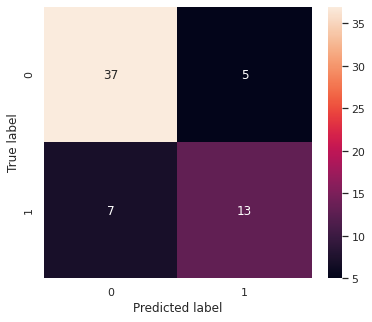

In [98]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [99]:
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred += cm[row,c]
        else:
            falsePred += cm[row,c]
print("*"*70)
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print("*"*70)
acc = corrPred/cm.sum()
print ('Accuracy of the Naive Bayes Clasification is {}% '.format(round(acc*100,2)))
print("*"*70)

**********************************************************************
Correct predictions:  50
False predictions 12
**********************************************************************
Accuracy of the Naive Bayes Clasification is 80.65% 
**********************************************************************


In [100]:
from sklearn.metrics import accuracy_score

print('The accuracy of the NB is {}%'.format(round(accuracy_score(y_pred,test_y)*100,2)))

The accuracy of the NB is 80.65%


In [101]:
nvclassifier.predict_proba(test_x)[:10]

array([[9.99976946e-01, 2.30544189e-05],
       [5.43618382e-01, 4.56381618e-01],
       [1.00000000e+00, 5.88570384e-17],
       [9.99920953e-01, 7.90472863e-05],
       [9.99996058e-01, 3.94244355e-06],
       [9.99720050e-01, 2.79949544e-04],
       [7.41812234e-03, 9.92581878e-01],
       [1.00000000e+00, 6.69383180e-17],
       [1.00000000e+00, 1.21419008e-26],
       [9.74310233e-01, 2.56897665e-02]])

I will recommend KNN than NB because it has a high accuracy than NB.